In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as nd

In [13]:
# funkcje do generowania obrazów binarnych - prostokąt, koło i elipsa

def generate_rectangle(x_size, y_size, x_b, y_b, width, height):
  image = np.zeros((y_size, x_size))
  image[y_b:y_b+height, x_b:x_b + width] = 1
  return image

def generate_circle(x_size, y_size, x_origin, y_origin, radius):
  grid_x, grid_y = np.meshgrid(np.arange(x_size), np.arange(y_size))
  image = (grid_x - x_origin)**2 + (grid_y - y_origin)**2 < radius**2
  return image

''' alternatywny sposób:
def make_circle(x_size, y_size, x0, y0, radius):
  image = np.zeros([y_size, x_size])
  for x in range(x_size):
    for y in range(y_size):
      if ((x-x0)*(x-x0)+(y-y0)*(y-y0)) < radius*radius:
        image[y,x] = 1
  return image


circle = make_circle(400, 200, 200, 100, 50)

plt.figure()
plt.imshow(circle, cmap='gray')
plt.show '''


def make_elipse(x_size, y_size, x0, y0, x_half_shaft, y_half_shaft):
  elipse = np.zeros([y_size, x_size])
  for x in range(x_size):
    for y in range(y_size):
      if ((x-x0)*(x-x0)/(x_half_shaft**2) + (y-y0)*(y-y0)/(y_half_shaft**2)) < 1:
        elipse[y,x] = 1
  return elipse

In [ ]:
# jak działa meshgrid:

x_grid, y_grid = np.meshgrid(np.arange(200), np.arange(100))

plt.figure()
plt.imshow(x_grid, cmap='gray')
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(y_grid)
plt.axis('off')
plt.show()

In [ ]:
# stworzenie prostokąta

x_size, y_size = 512, 512
x_b, y_b = 250, 150
width, height = 120, 240

rectangle = generate_rectangle(x_size, y_size, x_b, y_b, width, height)

plt.figure(dpi=200)
plt.imshow(rectangle, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
# stworzenie koła

x_size, y_size = 512, 512
x_origin, y_origin = 256, 256
radius = 150

circle = generate_circle(x_size, y_size, x_origin, y_origin, radius)

plt.figure(dpi=200)
plt.imshow(circle, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
# stworzenie elipsy

elipse = make_elipse(800, 400, 400, 200, 180, 120)

elipse_noise = np.logical_or(elipse, np.abs(np.random.randn(400, 800)) > 2)

plt.figure(dpi=150)
plt.imshow(elipse_noise, cmap='gray')
plt.show()

<function matplotlib.pyplot.show>

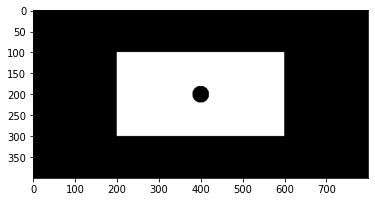

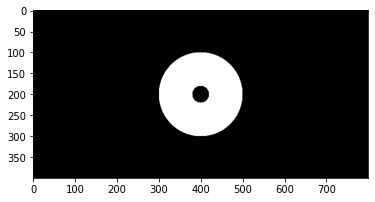

In [20]:
# funkcje i stworzenie obrazów z otworem

def make_rectangle_with_hole(x_size, y_size, x0, y0, width, height, radius):
  rectangle = generate_rectangle(x_size, y_size, x0, y0, width, height)
  not_hole = np.logical_not(generate_circle(x_size, y_size, (x0)+width/2, (y0)+height/2, radius))
  image = np.zeros([y_size, x_size])
  image = np.logical_xor(rectangle, not_hole)
  image = np.logical_not(image)
  return image

rectangle_with_hole = make_rectangle_with_hole(800, 400, 200, 100, 400, 200, 20)

plt.figure()
plt.imshow(rectangle_with_hole, cmap='gray')
plt.show  



def make_circle_with_hole(x_size, y_size, x0, y0, radius_big, radius_small):
  circle_inner = generate_circle(x_size, y_size, x0, y0, radius_big)
  not_hole = np.logical_not(generate_circle(x_size, y_size, x0, y0, radius_small))
  image = np.zeros([y_size, x_size])
  image = np.logical_xor(circle_inner, not_hole)
  image = np.logical_not(image)
  return image

circle_with_hole = make_circle_with_hole(800, 400, 400, 200, 100, 20)

plt.figure()
plt.imshow(circle_with_hole, cmap='gray')
plt.show  


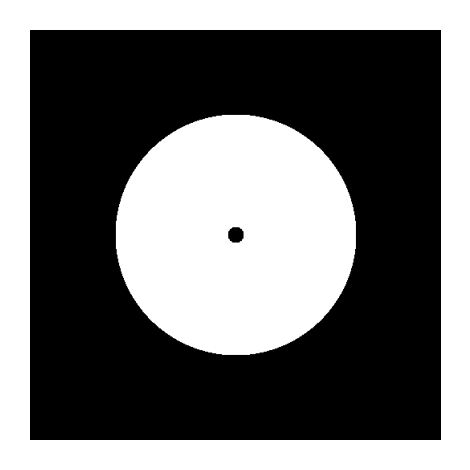

In [21]:
circle_with_hole = np.logical_and(circle, np.logical_not(generate_circle(x_size, y_size, x_origin, y_origin, 10)))

plt.figure(dpi=300)
plt.subplot(1, 3, 1)
plt.imshow(circle_with_hole, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
# dodanie szumu w tle do obrazu z kołem

circle_noise = np.logical_or(circle, np.abs(np.random.randn(y_size, x_size)) > 1.7)

plt.figure(dpi=200)
plt.imshow(circle_noise, cmap='gray')
plt.axis('off')
plt.show()

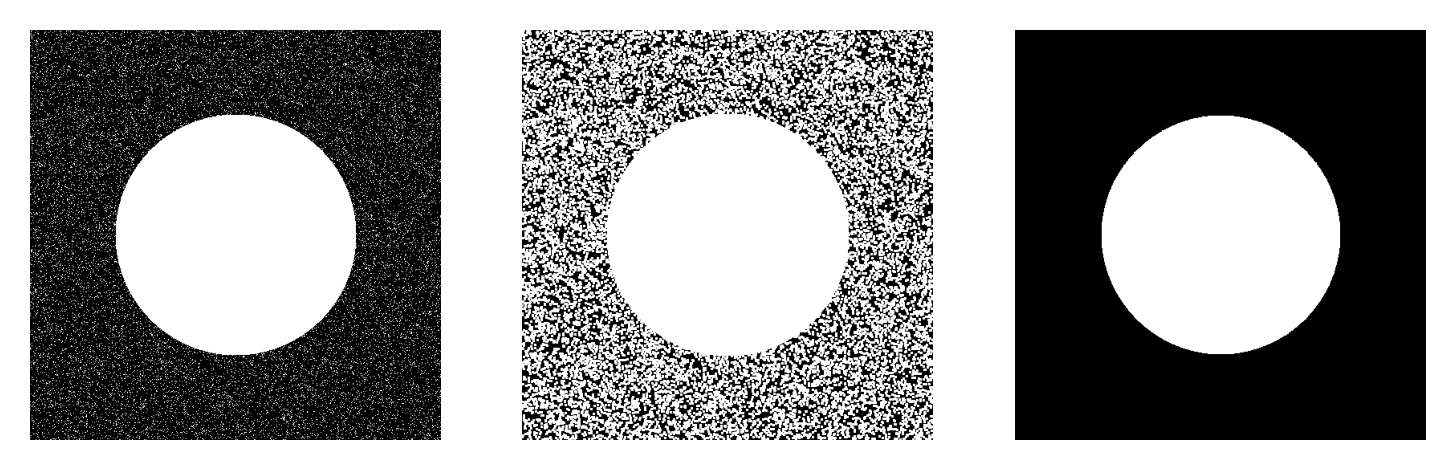

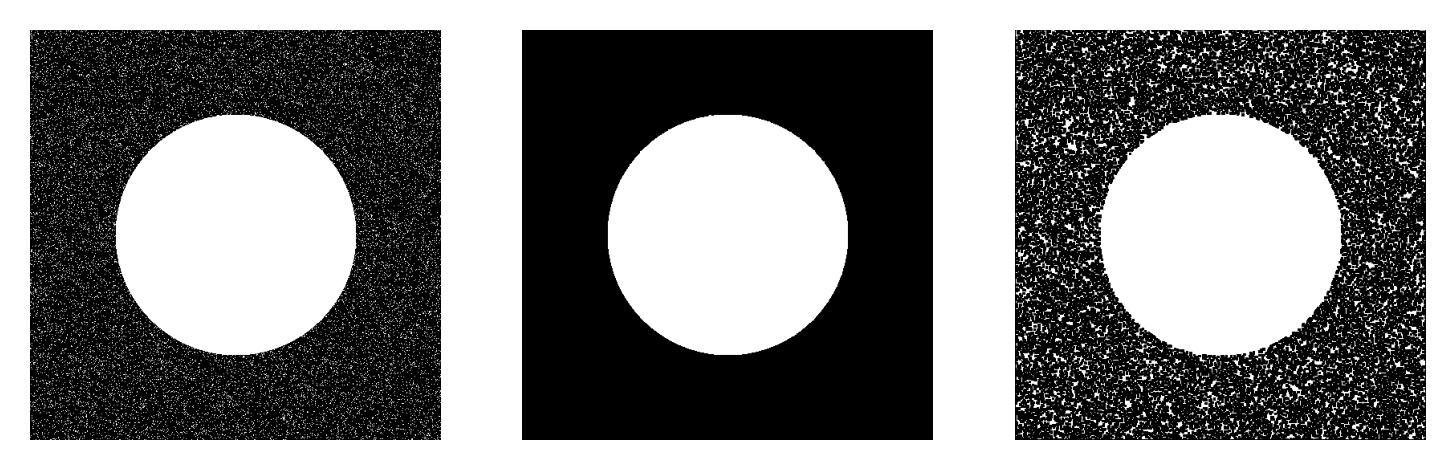

In [31]:
# działanie dylatacji, erozji, otwarcia, zamknięcia

dilated_circle = nd.binary_dilation(circle_noise, np.ones((3, 3)))
eroded_circle = nd.binary_erosion(circle_noise, np.ones((3, 3)))
circle_after_opening = nd.binary_opening(circle_noise, np.ones((3, 3)))
circle_after_closing = nd.binary_closing(circle_noise, np.ones((3, 3)))

plt.figure(dpi=300)
plt.subplot(1, 3, 1)
plt.imshow(circle_noise, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(dilated_circle, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(eroded_circle, cmap='gray')
plt.axis('off')
plt.show()

plt.figure(dpi=300)
plt.subplot(1, 3, 1)
plt.imshow(circle_noise, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(circle_after_opening, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(circle_after_closing, cmap='gray')
plt.axis('off')
plt.show()

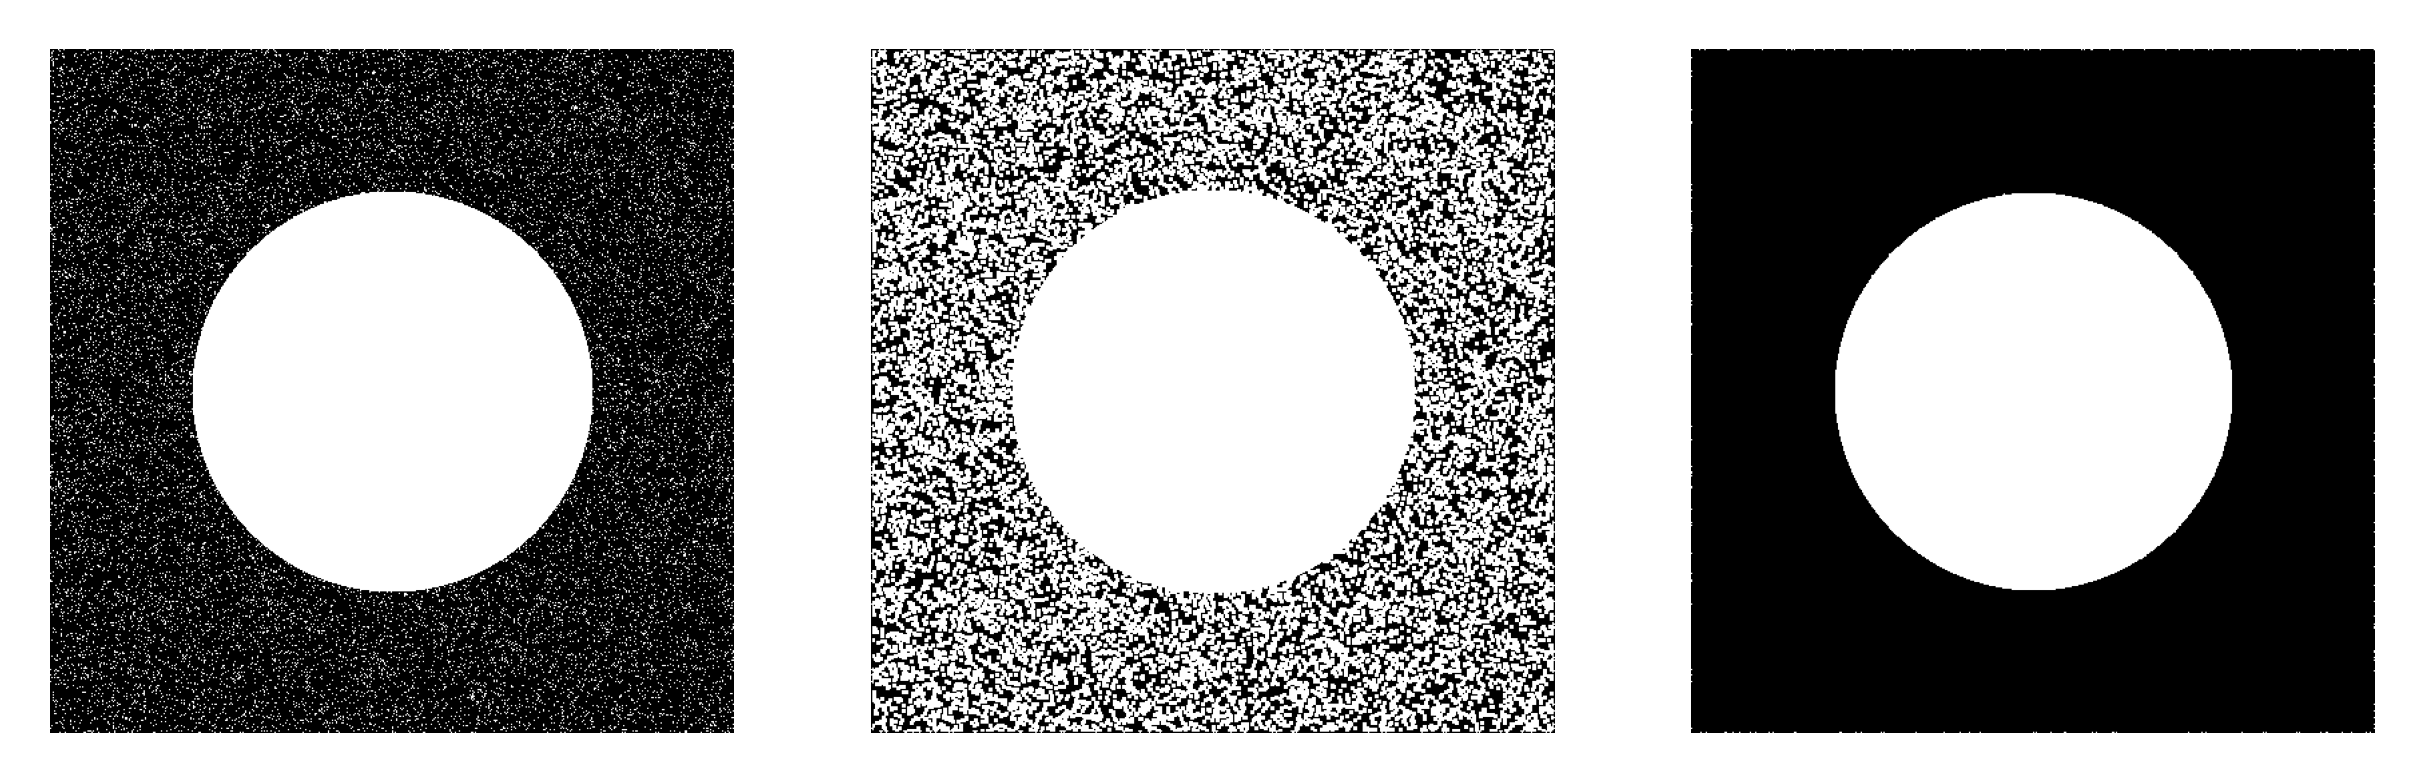

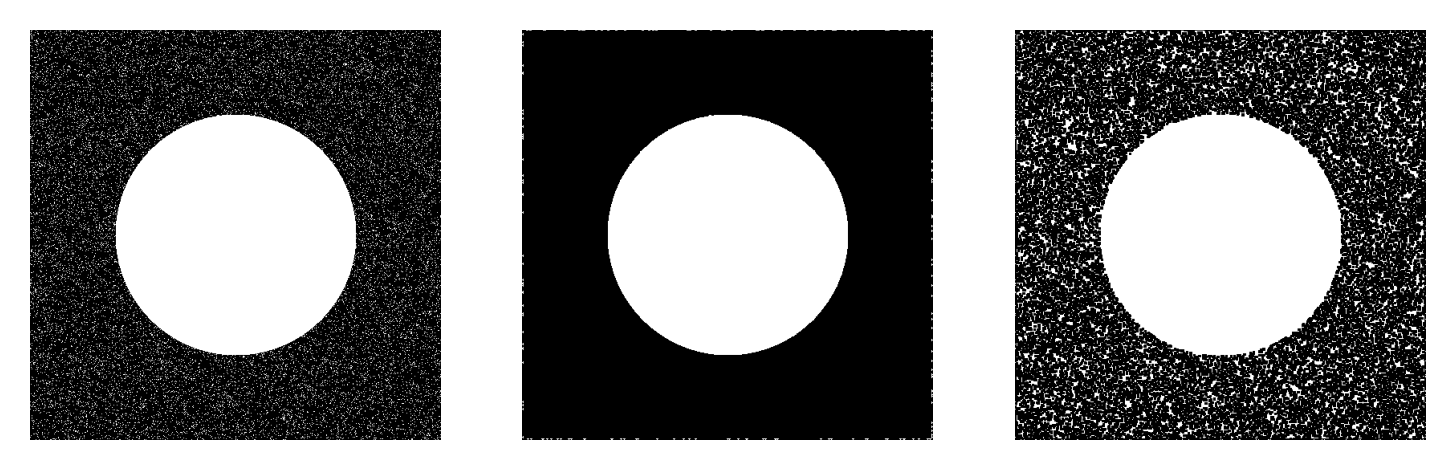

In [39]:
# moja implementacja erozji, dylatacji, otwarcia i zamknięcia

def my_erosion(image, se=np.ones((3,3))):
  a = se.shape[0]//2
  b = se.shape[1]//2
  after_erosion = np.copy(image)
  for y in range(a, after_erosion.shape[0]-a):
    for x in range(b, after_erosion.shape[1]-b):
      to_erode = np.logical_and(image[y-a:y+a+1,x-b:x+b+1], se)
      after_erosion[y,x] = np.min(to_erode)
  return after_erosion

def my_dilatation(image, se=np.zeros((3,3))):
  a = se.shape[0]//2
  b = se.shape[1]//2
  after_dilatation = np.copy(image)
  for y in range(a, after_dilatation.shape[0]-a):
    for x in range(b, after_dilatation.shape[1]-b):
      to_dilate = np.logical_or(image[y-a:y+a+1,x-b:x+b+1], se)
      after_dilatation[y,x] = np.max(to_dilate)
  return after_dilatation


se = np.array([[1,1,1],
               [1,1,1],
               [1,1,1]])

se_dil = np.array([[0,0,0],
                   [0,0,0],
                   [0,0,0]])

after_my_erosion = my_erosion(circle_noise, se)
after_my_dilatation = my_dilatation(circle_noise, se_dil)

plt.figure(dpi=500)
plt.subplot(1,3,1)
plt.imshow(circle_noise, cmap='gray')
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(after_my_dilatation, cmap='gray')
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(after_my_erosion, cmap='gray')
plt.axis('off')
plt.show()

circle_after__my_opening = my_dilatation(after_my_erosion)
circle_after_my_closing = my_erosion(after_my_dilatation)

plt.figure(dpi=300)
plt.subplot(1, 3, 1)
plt.imshow(circle_noise, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(circle_after__my_opening, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(circle_after_my_closing, cmap='gray')
plt.axis('off')
plt.show()

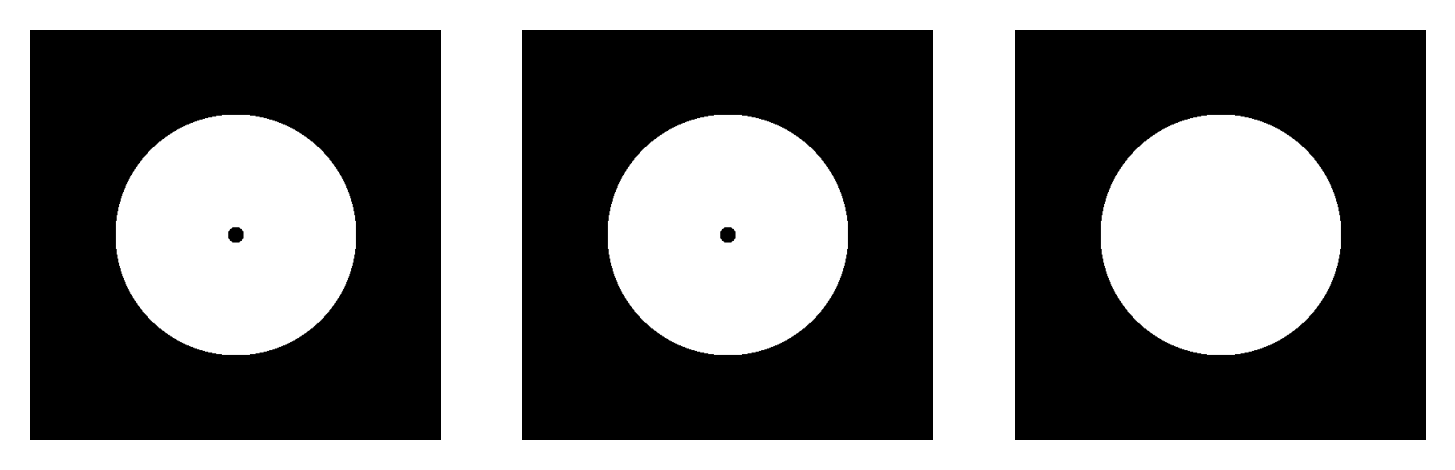

In [25]:
circle_with_hole_after_opening = nd.binary_opening(circle_with_hole, np.ones((21, 21)))
circle_with_hole_after_closing = nd.binary_closing(circle_with_hole, np.ones((3, 3)), iterations=15)

plt.figure(dpi=300)
plt.subplot(1, 3, 1)
plt.imshow(circle_with_hole, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(circle_with_hole_after_opening, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(circle_with_hole_after_closing, cmap='gray')
plt.axis('off')

plt.show()

In [ ]:
def our_dilation(image, se):
  return nd.generic_filter(image, lambda a: np.max(a), footprint=se.T)

def our_erosion(image, se):
  return nd.generic_filter(image, lambda a: np.min(a), footprint=se.T)

def our_opening(image, se):
  pass

def our_closing(image, se):
  pass

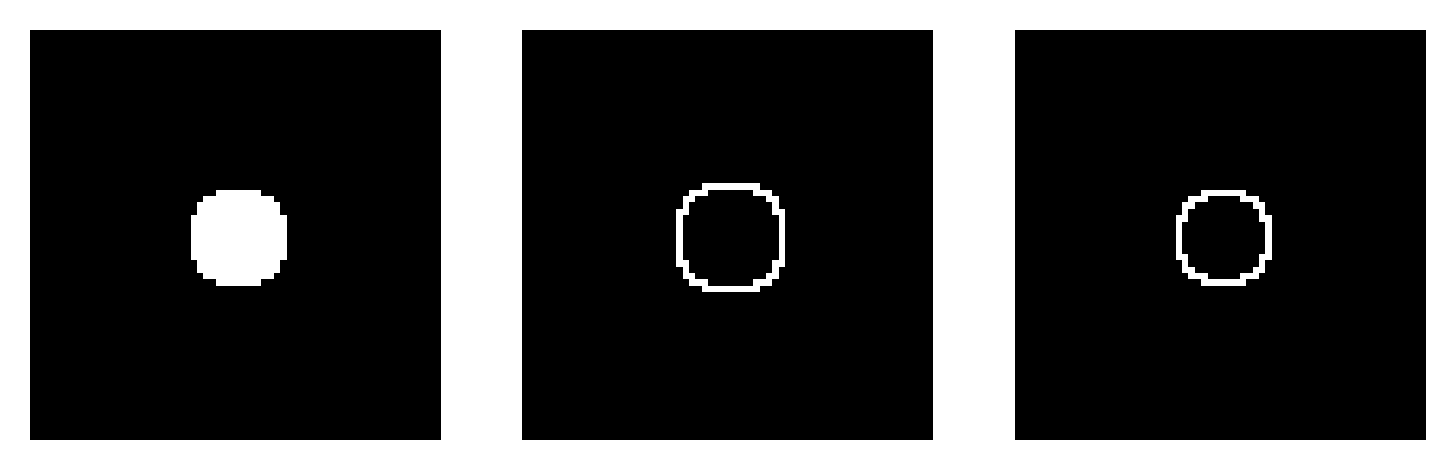

In [26]:
small_circle = generate_circle(64, 64, 32, 32, 8)

outer_edges = np.logical_xor(small_circle, nd.binary_dilation(small_circle, structure=np.ones((3, 3))))
inner_edges = np.logical_xor(small_circle, nd.binary_erosion(small_circle, structure=np.ones((3, 3))))

plt.figure(dpi=300)
plt.subplot(1, 3, 1)
plt.imshow(small_circle, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(outer_edges, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(inner_edges, cmap='gray')
plt.axis('off')

plt.show()